In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

In [2]:
rawdata=pd.read_csv("HW2_data.csv")

In [3]:
tempdict={'Name':[],'Sex':[],'Age':[],'HR':[],'Height':[],'Weight':[],'BP':[]}
organized=pd.DataFrame(tempdict)
#rawdata[ rawdata['0']=='Daniel' ]

In [4]:
namelist=list()
for i in range(rawdata.shape[0]):
        if rawdata.iloc[i,0] not in namelist:
            namelist.append(rawdata.iloc[i,0])

In [5]:
#1
for i in range(len(namelist)):
    organized.loc[str(i)]=[namelist[i],np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
    namemask=rawdata[ rawdata['0']==namelist[i] ]
    
    for j in range(namemask.shape[0]):
        if namemask.iloc[j,1] not in ['Name','Sex']:
            organized.loc[str(i),namemask.iloc[j,1]]=int(namemask.iloc[j,2])
        else:
            organized.loc[str(i),namemask.iloc[j,1]]=namemask.iloc[j,2]
organized

,Name,Sex,Age,HR,Height,Weight,BP
0,Daniel,M,37,80,165,72,131
1,Avery,F,66,72,159,54,121
2,Joseph,M,42,nan,168,70,110
3,Jackson,M,46,81,170,64,97
4,Nora,F,48,82,153,59,93
5,Aiden,M,38,93,166,69,136
6,Evelyn,F,60,67,168,60,106
7,Zoey,F,37,79,nan,nan,112
8,Matthew,M,69,85,166,70,128
9,Layla,F,12,87,156,47,142


In [6]:
#2
organized.loc['Average']=organized.mean(axis=0,skipna=True,numeric_only=True)
organized.tail(5)

,Name,Sex,Age,HR,Height,Weight,BP
46,Logan,M,62,87,177,76,nan
47,Oliver,M,45,62,184,66,139
48,Benjamin,M,39,72,164,68,122
49,Amelia,F,66,nan,151,49,119
Average,NaN,NaN,46,78,168,62,121


In [7]:
#3
for i in ['Age','HR','Height','Weight','BP']:
    temp=organized[organized[i]==organized[i].max()]
    print("Max %s : %s" %(i,temp.iloc[0,0]))

Max Age : Madison
Max HR : Liam
Max Height : Mason
Max Weight : Mason
Max BP : Lucas


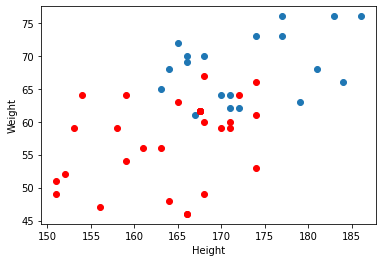

In [8]:
#4
plt.ylabel('Weight')
plt.xlabel('Height')
j=2
for i in ['Age','HR','Height','Weight','BP']:
    organized[i].fillna(organized.iloc[-1,j],inplace=True)
    j+=1
male=organized[organized['Sex']=='M']
plt.scatter(male['Height'],male['Weight'])
female=organized[organized['Sex']=='F']
malenum=male.shape[0]
femalenum=female.shape[0]
plt.scatter(female['Height'],female['Weight'],color='r')


<BarContainer object of 8 artists>

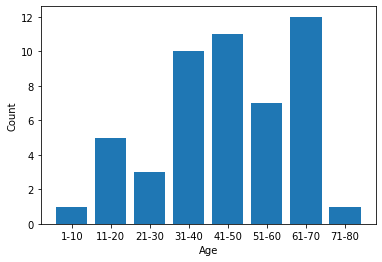

In [9]:
#5
x=['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
y=list()
Age=organized.iloc[:-1,2]
for i in range(8):
    cnt=Age[(Age>10*i) & (Age<=10*(i+1))].shape[0]
    y.append(cnt)
plt.ylabel('Count')
plt.xlabel('Age')
plt.bar(x,y)

(-1.113266738485024,
 1.1006317494516678,
 -1.1157843253706852,
 1.1236443641981664)

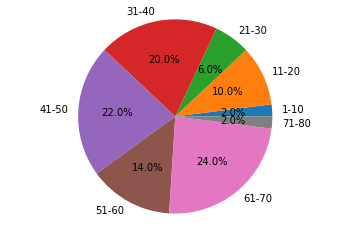

In [10]:
#5
plt.pie(y , labels = x,autopct='%1.1f%%')
plt.axis('equal')

(-1.1129928321258653,
 1.1006187372479035,
 -1.1138080485839223,
 1.117738285234205)

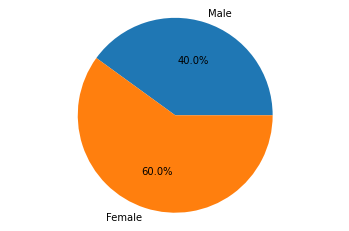

In [11]:
#6
plt.pie([malenum,femalenum] , labels = ['Male','Female'],autopct='%1.1f%%')
plt.axis('equal')